In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.tree import DecisionTreeRegressor as DT

In [2]:
n = 5000
df = pd.DataFrame()
df['age'] = np.random.randint(25, 76, size=n)

In [3]:
df

,age
0,28
1,58
2,62
3,61
4,49
...,...
4995,43
4996,49
4997,51
4998,40


In [4]:
a=-10.5159
b=0.0522258
timeout = 1000

In [24]:
prob_values = 1/(1+np.exp(-a-b*df['age']))

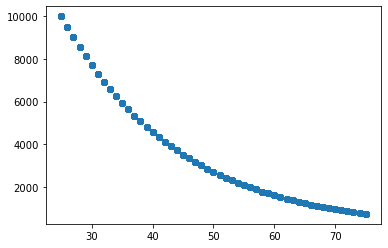

In [25]:
plt.scatter(df['age'],1/prob_values);

In [7]:
days = prob_values.apply(lambda p:geom(p).rvs())
df['observation'] = np.where(days <= timeout, days, np.nan)
df

,age,observation
0,28,NaN
1,58,NaN
2,62,NaN
3,61,NaN
4,49,NaN
...,...,...
4995,43,NaN
4996,49,194.0
4997,51,263.0
4998,40,NaN


In [8]:
(df['observation'].isna()).mean()

0.6532

In [43]:
days.max()/365

175.7972602739726

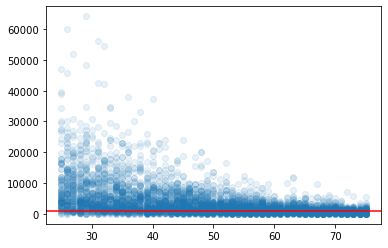

In [9]:
plt.scatter(df['age'],days, alpha=.1)
plt.axhline(timeout, color='red');

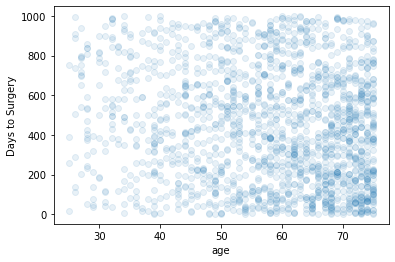

In [44]:
plt.scatter(df['age'], df['observation'], alpha = .1)
plt.xlabel('age')
plt.ylabel('Days to Surgery');

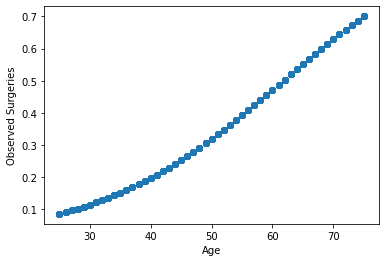

In [47]:
S = LogR().fit(df[['age']],df['observation'].isna()).predict_proba(df[['age']])[:,0]
plt.scatter(df['age'], S)
plt.xlabel('Age')
plt.ylabel('Observed Surgeries');

In [12]:
df['imputed_days'] = np.where(df['observation'].isna(), timeout + (1/(1-(1-S)**(1/timeout))), df['observation'])
df

,age,observation,imputed_days
0,28,NaN,10260.931407
1,58,NaN,2728.521640
2,62,NaN,2429.446784
3,61,NaN,2497.522499
4,49,NaN,3745.208245
...,...,...,...
4995,43,NaN,4823.816023
4996,49,194.0,194.000000
4997,51,263.0,263.000000
4998,40,NaN,5538.358882


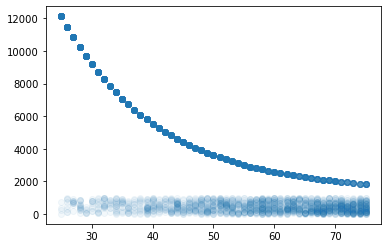

In [13]:
plt.scatter(df['age'], df['imputed_days'], alpha = .05)

In [15]:
df['probability'] = 1/DT().fit(df[['age']], df['imputed_days']).predict(df[['age']])
df

,age,observation,imputed_days,probability
0,28,NaN,10260.931407,0.000113
1,58,NaN,2728.521640,0.000592
2,62,NaN,2429.446784,0.000725
3,61,NaN,2497.522499,0.000654
4,49,NaN,3745.208245,0.000373
...,...,...,...,...
4995,43,NaN,4823.816023,0.000270
4996,49,194.0,194.000000,0.000373
4997,51,263.0,263.000000,0.000424
4998,40,NaN,5538.358882,0.000231


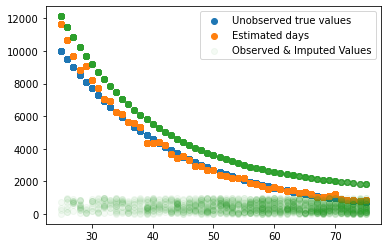

In [52]:
plt.scatter(df['age'],1/prob_values, label = 'Unobserved true values');
plt.scatter(df['age'], 1/df['probability'], label = 'Estimated days')
plt.scatter(df['age'], df['imputed_days'], alpha = .05, label = 'Observed & Imputed Values')
plt.legend()

In [17]:
log_odds = np.log(df['probability']/(1-df['probability']))
log_odds

0      -9.086949
1      -7.431517
2      -7.228904
3      -7.331959
4      -7.892737
          ...   
4995   -8.216114
4996   -7.892737
4997   -7.765961
4998   -8.372065
4999   -9.272505
Name: probability, Length: 5000, dtype: float64

In [18]:
lr = LR().fit(df[['age']], log_odds)

In [19]:
lr.intercept_, a

(-10.553131128743782, -10.5159)

In [20]:
lr.coef_, b

(array([0.05276909]), 0.0522258)

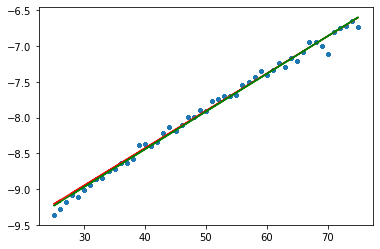

In [21]:
plt.scatter(df['age'], log_odds, s=10)
plt.plot(df['age'], df['age']*b+a, color = 'red')
plt.plot(df['age'], lr.predict(df[['age']]), color = 'green');

In [22]:
df['target']= df['probability'].apply(lambda p:geom(p).cdf(18*30)-geom(p).cdf(6*30))
df

,age,observation,imputed_days,probability,target
0,28,NaN,10260.931407,0.000113,0.039103
1,58,NaN,2728.521640,0.000592,0.172566
2,62,NaN,2429.446784,0.000725,0.201625
3,61,NaN,2497.522499,0.000654,0.186497
4,49,NaN,3745.208245,0.000373,0.117598
...,...,...,...,...,...
4995,43,NaN,4823.816023,0.000270,0.088298
4996,49,194.0,194.000000,0.000373,0.117598
4997,51,263.0,263.000000,0.000424,0.131115
4998,40,NaN,5538.358882,0.000231,0.076610


/home/land/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


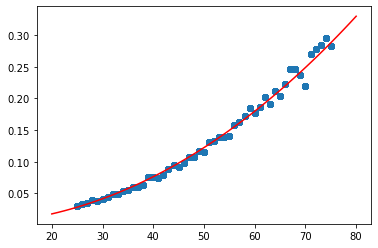

In [41]:
plt.scatter(df['age'], df['target'])
ages = np.linspace(20, 80)
plt.plot(ages, np.exp(LR().fit(np.log(df[['age']]),
                                       np.log(df['target'])
                                      )
                              .predict(np.log(ages.reshape(-1,1)))),
                            color = 'red');


/tmp/ipykernel_163048/220404005.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ss, timeout+1/(1-(1-ss)**(1/timeout)))
/tmp/ipykernel_163048/220404005.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ss, timeout+1/((1-(1-ss)**(1/timeout))*(1-ss)))


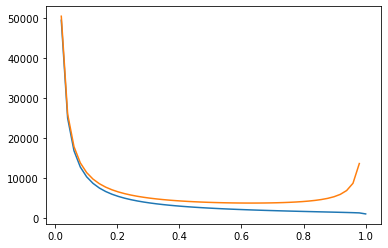

In [58]:
ss = np.linspace(0,1)
plt.plot(ss, timeout+1/(1-(1-ss)**(1/timeout)))
plt.plot(ss, timeout+1/((1-(1-ss)**(1/timeout))*(1-ss)))